In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

/tmp/ipykernel_15866/149545680.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [6]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [3]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
372,373,120,RL,50.0,7175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,125000
118,119,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,320000
654,655,20,RL,91.0,10437,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,350000


In [4]:
len(df)

1460

<Axes: ylabel='Frequency'>

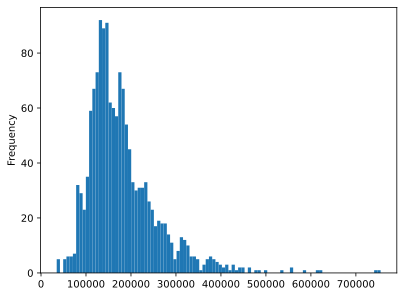

In [5]:
df.SalePrice.plot.hist(bins=100)

<Axes: ylabel='Frequency'>

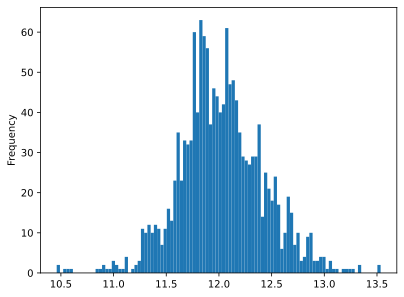

In [7]:
df.SalePrice = np.log(df.SalePrice)
df.SalePrice.plot.hist(bins=100)

(1460, 81)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,0.010601,0.033226,0.028365,0.012609,0.012713,0.021998,0.050298,0.005024,...,0.029643,0.000477,0.002889,0.046635,0.001330,0.057044,0.006242,0.021172,0.000712,0.021917
MSSubClass,0.011156,1.000000,0.386347,0.139781,0.032628,0.059316,0.027850,0.040581,0.022936,0.069836,...,0.012579,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407,0.084284
LotFrontage,0.010601,0.386347,1.000000,0.426095,0.251646,0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.033226,0.139781,0.426095,1.000000,0.105806,0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.014261,0.263843
OverallQual,0.028365,0.032628,0.251646,0.105806,1.000000,0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347,0.790982


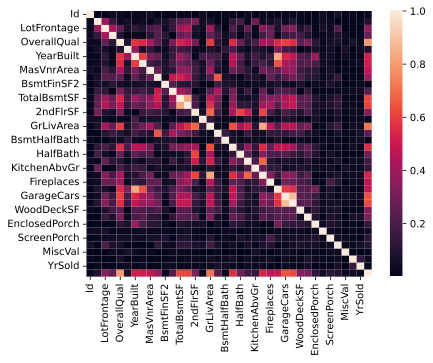

In [6]:
df_num = df.select_dtypes(include=['int64', 'float64'])
print(df.shape)
sns.heatmap(df_num.corr().abs())
df_num.corr().abs().head(5)

<Axes: >

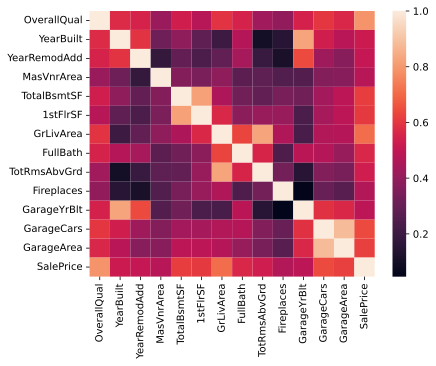

In [7]:
# chose the highest correlation between variable and a SalePrice
price_corr = df_num.corr().abs()['SalePrice']
top_corr_features = price_corr[price_corr > 0.4 ].index
sns.heatmap(df_num.corr().loc[top_corr_features, top_corr_features])

In [8]:
price_corr[price_corr.abs() > 0.4].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

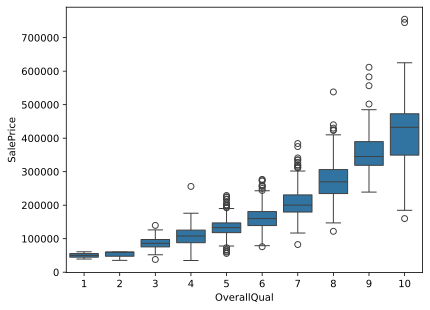

In [9]:
sns.boxplot(y='SalePrice', x='OverallQual', data=df)

<Axes: ylabel='Frequency'>

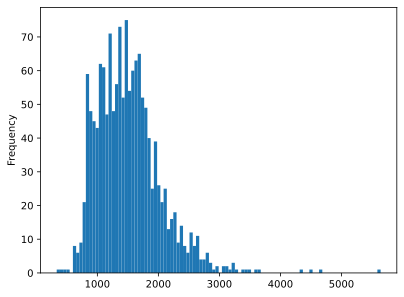

In [10]:
df.GrLivArea.plot.hist(bins=100)

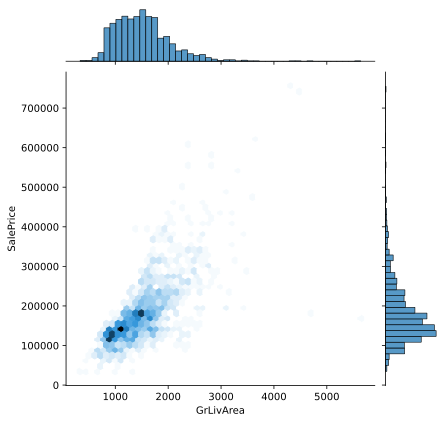

In [11]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=df, kind='hex')

<Axes: ylabel='Frequency'>

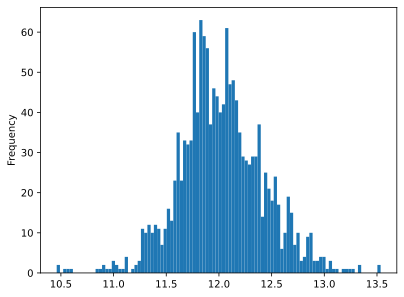

In [12]:
# Normalization 
df.SalePrice = np.log(df.SalePrice)
df.SalePrice.plot.hist(bins=100)

In [13]:
# Get the all the categorical values and transfor it to one hot encoding
cat_features = df.select_dtypes(include='object')
cat_features = pd.get_dummies(cat_features).astype(int)
cat_features.shape

(1460, 251)

In [34]:
# Get all numerical values
num_features = df.select_dtypes(include=['int64', 'float64'])
num_features = (num_features - num_features.mean()) / num_features.std()
num_features.shape

(1460, 38)

In [35]:
joined_df = pd.concat([cat_features, num_features], axis=1)
joined_df.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730,0.559876
1,0,0,0,1,0,0,1,0,0,0,...,1.625638,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228,0.212692
2,0,0,0,1,0,0,1,0,0,1,...,-0.751918,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730,0.733795


In [36]:
df.isna().sum(axis=0).sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

## Modeling

In [71]:
#features_df =joined_df.copy().fillna(0.0)
features_df = joined_df[['OverallQual', 'GrLivArea']]
target = joined_df[['SalePrice']]
features_df.sample(2)

,OverallQual,GrLivArea
145,-0.071812,0.368304
1445,-0.071812,-1.146501


In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.25 ,random_state=0)

In [73]:
from sklearn.linear_model import LinearRegression, RidgeCV
model = RidgeCV()
model.fit(x_train, y_train)

RidgeCV()

In [74]:
print(model.coef_)

[[0.61395358 0.37182364]]


In [70]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
print("MSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

MSE: 0.0010345114490084568


In [31]:
from sklearn.dummy import DummyRegressor
baseline = DummyRegressor(strategy='mean')
baseline.fit(x_train, y_train)
base_predict = baseline.predict(x_test)
np.sqrt(mean_squared_error(base_predict, y_test))

0.3857090488120992

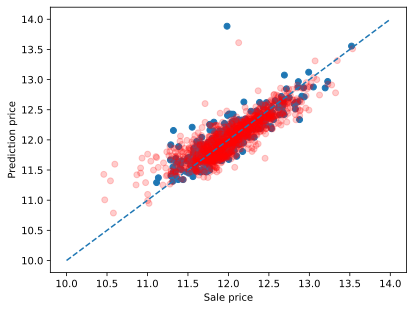

In [163]:
# compare test set and train set
plt.scatter(y_test, y_pred)
plt.scatter(y_train, model.predict(x_train), c='r', alpha=0.2)
plt.xlabel('Sale price')
plt.ylabel('Prediction price')
plt.plot([10., 14.], [10., 14.], '--')